In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sharper plots
%config InlineBackend.figure_format = 'retina'

In [2]:
def impute_nan_with_median(table):
    for col in table.columns:
        table[col] = table[col].fillna(table[col].median())
    return table

In [3]:
PATH_TO_DATA = Path("../../_static/data/assignment5/")

In [4]:
data = pd.read_csv(PATH_TO_DATA / "credit_scoring_sample.csv.zip", sep=";")
data.head()

SeriousDlqin2yrs  age  NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  \
0                 0   64                                     0     0.249908   
1                 0   58                                     0  3870.000000   
2                 0   41                                     0     0.456127   
3                 0   43                                     0     0.000190   
4                 1   49                                     0     0.271820   

   NumberOfTimes90DaysLate  NumberOfTime60-89DaysPastDueNotWorse  \
0                        0                                     0   
1                        0                                     0   
2                        0                                     0   
3                        0                                     0   
4                        0                                     0   

   MonthlyIncome  NumberOfDependents  
0         8158.0                 0.0  
1            NaN                 0.0  
2         6666.0                 0.0  
3        10500.0                 2.0  
4          400.0                 0.0

In [5]:
data.dtypes

SeriousDlqin2yrs                          int64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
NumberOfTimes90DaysLate                   int64
NumberOfTime60-89DaysPastDueNotWorse      int64
MonthlyIncome                           float64
NumberOfDependents                      float64
dtype: object

Distribution of target:


0    0.777511
1    0.222489
Name: SeriousDlqin2yrs, dtype: float64

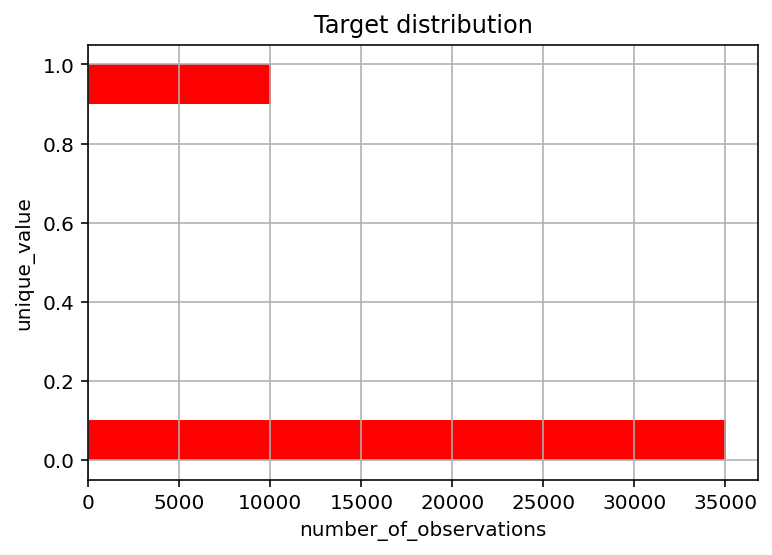

In [6]:
ax = data["SeriousDlqin2yrs"].hist(orientation="horizontal", color="red")
ax.set_xlabel("number_of_observations")
ax.set_ylabel("unique_value")
ax.set_title("Target distribution")

print("Distribution of target:")
data["SeriousDlqin2yrs"].value_counts(normalize=True)

In [7]:
independent_columns_names = data.columns.values
independent_columns_names = [x for x in data if x != "SeriousDlqin2yrs"]
independent_columns_names

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'MonthlyIncome',
 'NumberOfDependents']

In [8]:
table = impute_nan_with_median(data)

In [9]:
X = table[independent_columns_names]
y = table["SeriousDlqin2yrs"]

In [10]:
# you'll be asked to fix this seed (`random_state`) everywhere in this notebook
SEED = 17

In [11]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt = DecisionTreeClassifier(random_state=SEED, class_weight="balanced")

In [14]:
max_depth_values = [5, 6, 7, 8, 9]
max_features_values = [4, 5, 6, 7]
tree_params = {"max_depth": max_depth_values, "max_features": max_features_values}

In [15]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

In [16]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [17]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score


class RandomForestClassifierCustom(BaseEstimator):
    def __init__(
        self, n_estimators=10, max_depth=10, max_features=10, random_state=SEED
    ):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state

        self.trees = []
        self.feat_ids_by_tree = []

    def fit(self, X, y):
        # You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
        pass

    def predict_proba(self, X):
        # You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)
        pass

In [18]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [21]:
max_depth_values = range(5, 15)
max_features_values = [4, 5, 6, 7]
forest_params = {"max_depth": max_depth_values, "max_features": max_features_values}

In [22]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
logit = LogisticRegression(
    random_state=SEED, solver="liblinear", class_weight="balanced"
)

logit_pipe = Pipeline([("scaler", scaler), ("logit", logit)])
logit_pipe_params = {"logit__C": np.logspace(-8, 8, 17)}

In [24]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [25]:
# Download data
df = pd.read_csv(PATH_TO_DATA / "movie_reviews_train.csv.zip", nrows=50000)

# Split data to train and test
X_text = df["text"]
y_text = df["label"]

# Classes counts
df.label.value_counts()

1    32492
0    17508
Name: label, dtype: int64

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

# Split on 3 folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

# In Pipeline we will modify the text and train logistic regression
classifier = Pipeline(
    [
        ("vectorizer", CountVectorizer(max_features=100000, ngram_range=(1, 3))),
        ("clf", LogisticRegression(solver="liblinear", random_state=SEED)),
    ]
)

In [27]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)

In [28]:
classifier = Pipeline(
    [
        ("vectorizer", CountVectorizer(max_features=100000, ngram_range=(1, 3))),
        ("clf", RandomForestClassifier(n_estimators=10, random_state=SEED, n_jobs=-1)),
    ]
)

min_samples_leaf = [1, 2, 3]
max_features = [0.3, 0.5, 0.7]
max_depth = [None]

In [29]:
# You code here (read-only in a JupyterBook, pls run jupyter-notebook to edit)